Questions at https://docs.google.com/document/d/1jPOO_M48uGiGSbxUk3HkZF4GqEvfUJLZEycCsCsnZnY/edit

In [25]:
%matplotlib inline
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go
path = './image-processing/Image Processing/'

In [2]:
image = cv2.imread(path+'lena.png')

In [3]:
image.shape

(512, 512, 3)

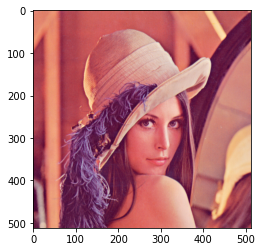

In [15]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
chair_im = cv2.imread(path+'chair.png',cv2.IMREAD_UNCHANGED)

In [17]:
chair_im.shape

(137, 137, 4)

In [18]:
cv2.imshow('Image',chair_im)
cv2.waitKey(0)
cv2.destroyAllWindows()

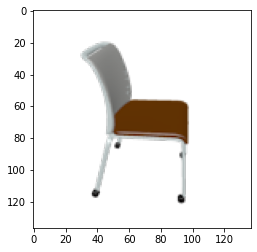

In [19]:
plt.imshow(chair_im)

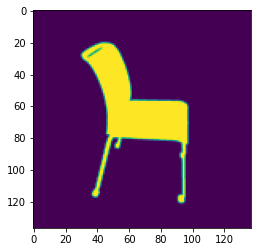

In [21]:
plt.imshow(chair_im[:,:,3])

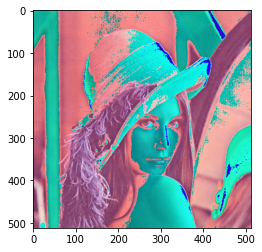

In [23]:
lena_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow((lena_rgb+45)%256)

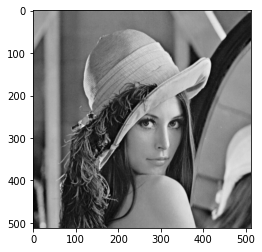

In [78]:
lena_gs = cv2.imread(path+'lena.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(lena_gs,cmap='gray')

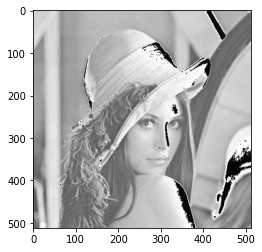

In [79]:
plt.imshow((lena_gs+45),cmap='gray')

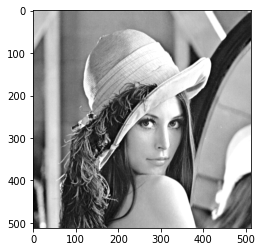

In [76]:
lena_temp = lena_gs.astype('int')
lena_temp = np.clip(lena_temp+45,0,250).astype('uint8')
plt.imshow(lena_temp,cmap='gray')

[]

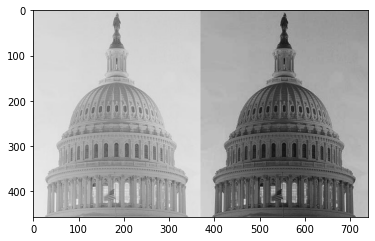

In [82]:
salt_noise = cv2.imread(path+'gamma1.jpg')
salt_noise.shape
plt.imshow(salt_noise)
plt.plot()
salt_noise_ =salt_noise / np.max(salt_noise)
salt_noise_ = salt_noise_**2.5
salt_noise_ = salt_noise_/np.max(salt_noise_)
salt_noise_ = (salt_noise_*255).astype('uint8')
plt.imshow(np.hstack([salt_noise,salt_noise_]))
plt.plot()


[]

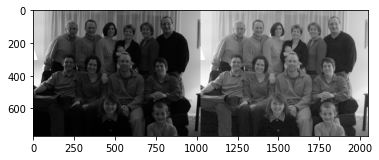

In [81]:
gamma2 = cv2.imread(path+'gamma2.jpg')
gamma2.shape
plt.imshow(gamma2)
plt.plot()
gamma2_ =gamma2 / np.max(salt_noise)
gamma2_ = gamma2_**0.5
gamma2_ = gamma2_/np.max(gamma2_)
gamma2_ = (gamma2_*255).astype('uint8')
plt.imshow(np.hstack([gamma2,gamma2_]))
plt.plot()
gamma.ravel()

In [261]:
def return_histogram(I):
    if len(I.shape) == 2 or I.shape[2] == 1:
        counts,bins = np.histogram(I.ravel(),256,[0,256])
        bins = 0.5 * (bins[:-1] + bins[1:])
        fig = px.bar(x=bins, y=counts, labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
    elif (I.shape[2] == 3):
        colors = ['red','blue','green']
        fig = go.Figure()
        for i in range(3):
            counts,bins = np.histogram(image[:,:,i].ravel(),256,[0,256])
            bins = 0.5 * (bins[:-1] + bins[1:])
            fig.add_trace(go.Histogram(x=counts,text=colors[i]))
            # Overlay both histograms
            fig.update_layout(barmode='overlay')
            # Reduce opacity to see both histograms
            fig.update_traces(opacity=0.75) 
    return fig


In [262]:
return_histogram(image).show()

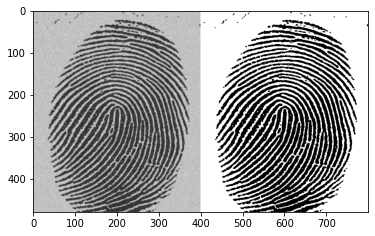

In [101]:
I = cv2.imread(path+'FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
figure = return_histogram(I)
figure.show()
ret,thresh1 = cv2.threshold(I,125,255,cv2.THRESH_BINARY)
plt.imshow(np.hstack([I, thresh1]),cmap='gray')

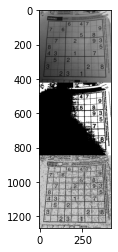

In [119]:
I = cv2.imread(path+'sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
figure = return_histogram(I)
figure.show()
ret, thresh1 = cv2.threshold(I,125,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(I,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
plt.imshow(np.hstack([I, thresh1,thresh2]),cmap='gray')
return_histogram(thresh2).show()

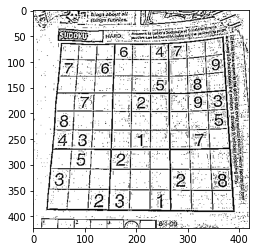

In [146]:
I = cv2.imread(path+'sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
thresh2 = cv2.adaptiveThreshold(I,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,3)
plt.imshow(thresh2,cmap='gray')

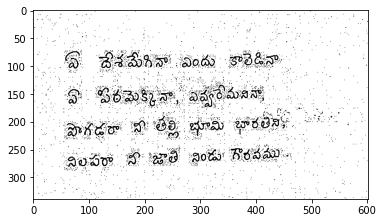

In [116]:
I = cv2.imread(path+'text.jpg', cv2.IMREAD_GRAYSCALE)
thresh2 = cv2.adaptiveThreshold(I,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
plt.imshow(thresh2,cmap='gray')

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


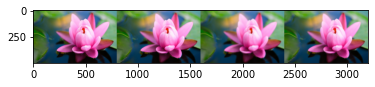

In [150]:
I = cv2.cvtColor(cv2.imread(path+'lotus.jpg'),cv2.COLOR_BGR2RGB)

kernel = np.ones((3,3),np.float32)/9
print (kernel)
filtered_image1 = cv2.filter2D(I,-1,kernel)

filtered_image2 = cv2.blur(I,(9,9),0)
filtered_image3 = cv2.GaussianBlur(I,(9,9),0)


plt.imshow(np.hstack([I, filtered_image1, filtered_image2,filtered_image3]))

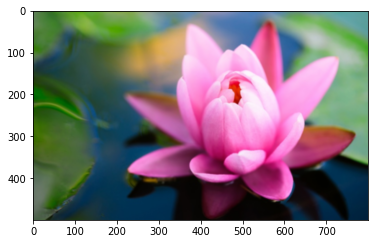

In [151]:
plt.imshow(filtered_image1)

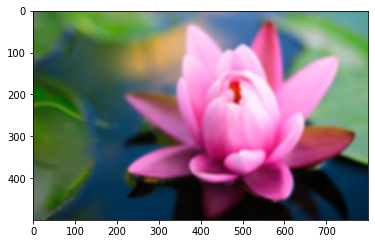

In [152]:
plt.imshow(filtered_image2)

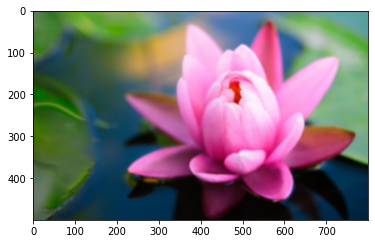

In [153]:
plt.imshow(filtered_image3)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


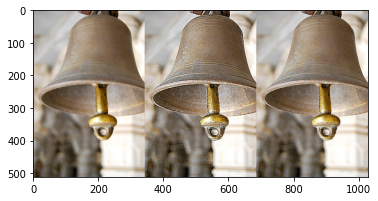

In [162]:
I = cv2.cvtColor(cv2.imread(path+'bell.jpg'),cv2.COLOR_BGR2RGB)
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
print (kernel)
filtered_image1 = cv2.filter2D(I,-1,kernel)
kernel2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
print(kernel2)
filtered_image2 = cv2.filter2D(I,-1,kernel2)
plt.imshow(np.hstack([I, filtered_image1, filtered_image2]))

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


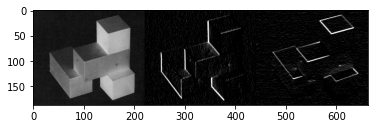

In [170]:
I = cv2.cvtColor(cv2.imread(path+'cubes.png'),cv2.COLOR_BGR2GRAY)
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print (kernel)
filtered_image1 = cv2.filter2D(I,-1,kernel)
kernel2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print(kernel2)
filtered_image2 = cv2.filter2D(I,-1,kernel2)
plt.imshow(np.hstack([I, filtered_image1, filtered_image2]),cmap='gray')

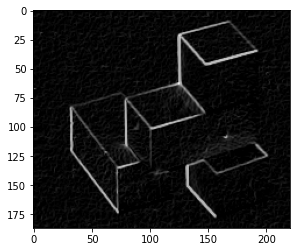

In [174]:
magnitude = np.sqrt(np.square(filtered_image1.astype('int')) + np.square(filtered_image2.astype('int')))
plt.imshow(magnitude,cmap='gray')

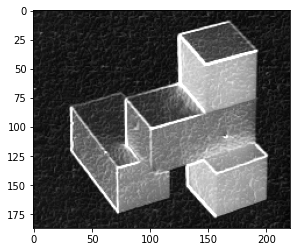

In [175]:
plt.imshow(np.clip((I + magnitude),0,255).astype('uint8'),cmap='gray')

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


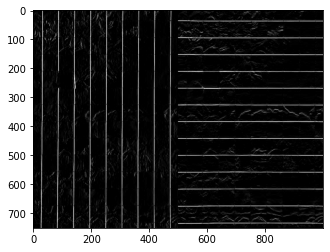

In [182]:
I = cv2.cvtColor(cv2.imread(path+'window.jpeg'),cv2.COLOR_BGR2GRAY)
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print (kernel)
filtered_image1 = cv2.filter2D(I,-1,kernel)
kernel2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print(kernel2)
filtered_image2 = cv2.filter2D(I,-1,kernel2)
plt.imshow(np.hstack([filtered_image1,filtered_image2]),cmap='gray')

In [222]:
def get_counts(arr,mini):
    counts = 0
    flag = 1
    for x in arr:
        if x>= mini and flag == 1:
            counts += 1
            flag = 0
        elif x<mini:
            flag = 1
    return counts

In [244]:
w = round(np.mean([ np.sum(get_counts(filtered_image1[i,:],150)) for i in range(filtered_image1.shape[0])]),0)
w

9.0

In [245]:
l = round(np.mean([ np.sum(get_counts(filtered_image2[:,i],150)) for i in range(filtered_image2.shape[1])]),0)
l

13.0

In [246]:
(w+1)*(l+1)

140.0